In [ ]:
#load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



# Data Preparation

In [ ]:
#load the dataset
Data=pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# Exploratory Data Analysis (EDA):

In [ ]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
Data.shape    # 908 rows and 13 columns

(908, 13)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
Data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
#check the datatypes
Data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [ ]:
#check the unique values
Data.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [ ]:
#check the null values
Data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
Data['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [ ]:
Data['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [ ]:
Data['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [ ]:
Data['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

# Histogram

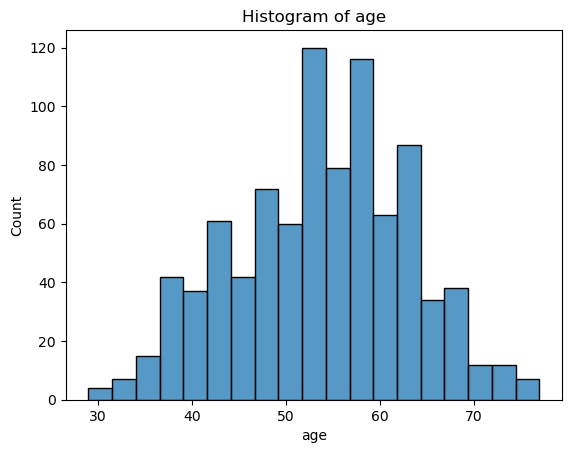

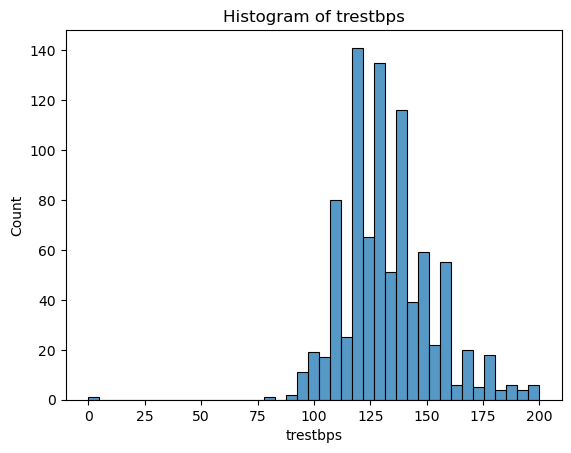

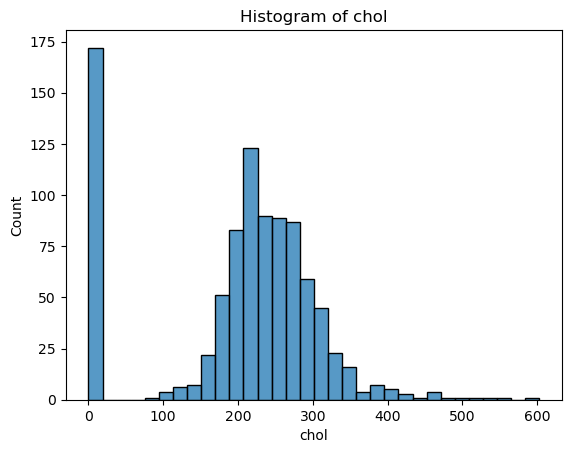

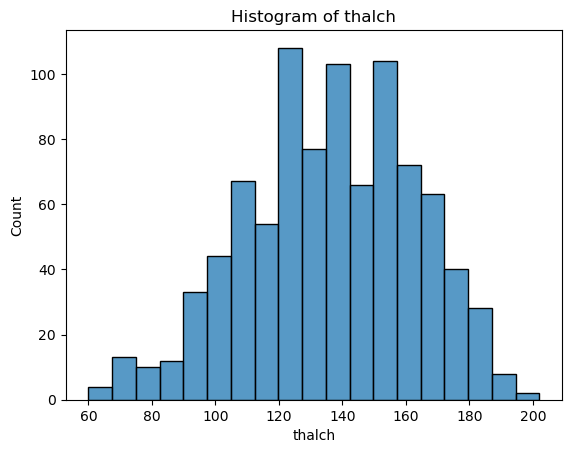

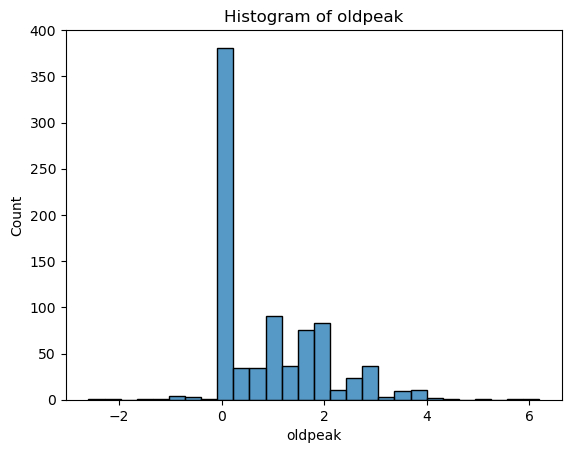

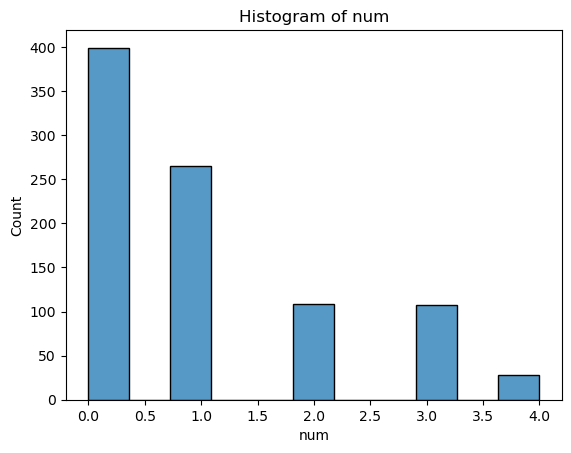

In [ ]:
columns = ['age','trestbps','chol','thalch','oldpeak','num']
for column in columns:
    sns.histplot(Data[column])
    plt.title(f'Histogram of {column}')
    plt.show()

# Boxplot

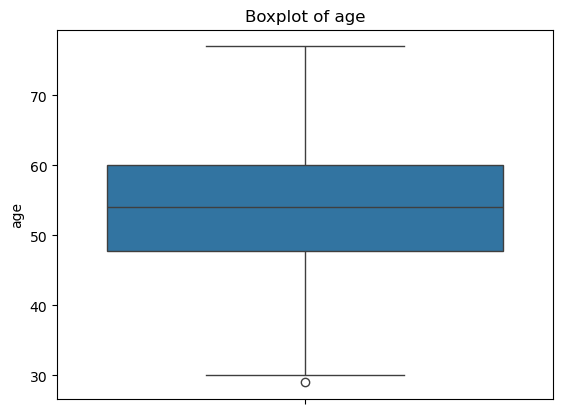

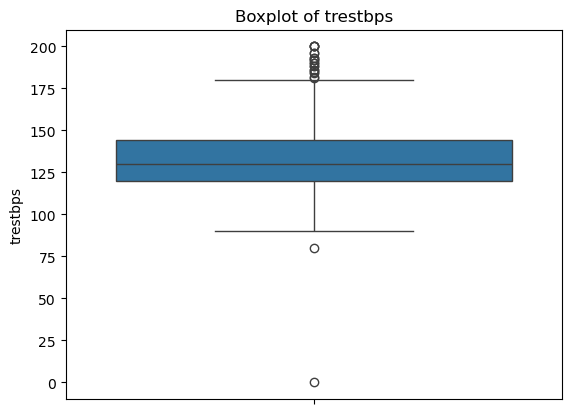

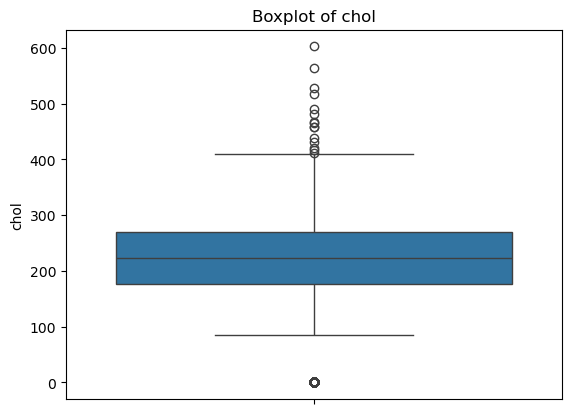

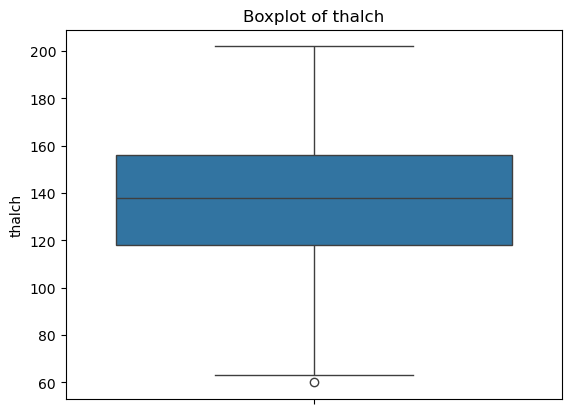

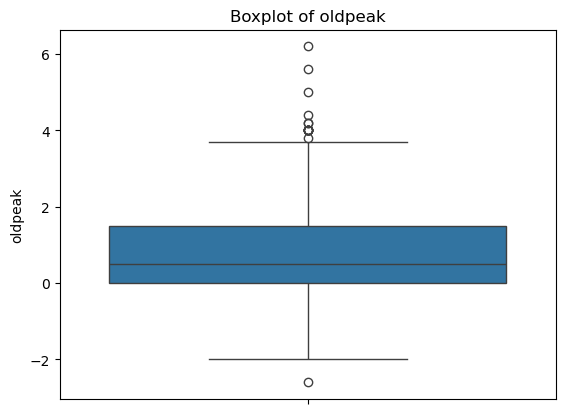

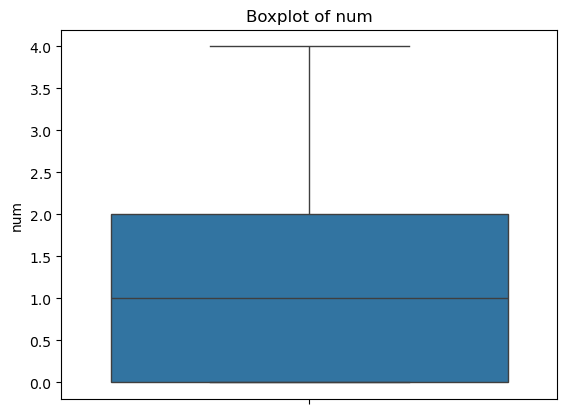

In [ ]:
columns = ['age','trestbps','chol','thalch','oldpeak','num']
for column in columns:
    sns.boxplot(Data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

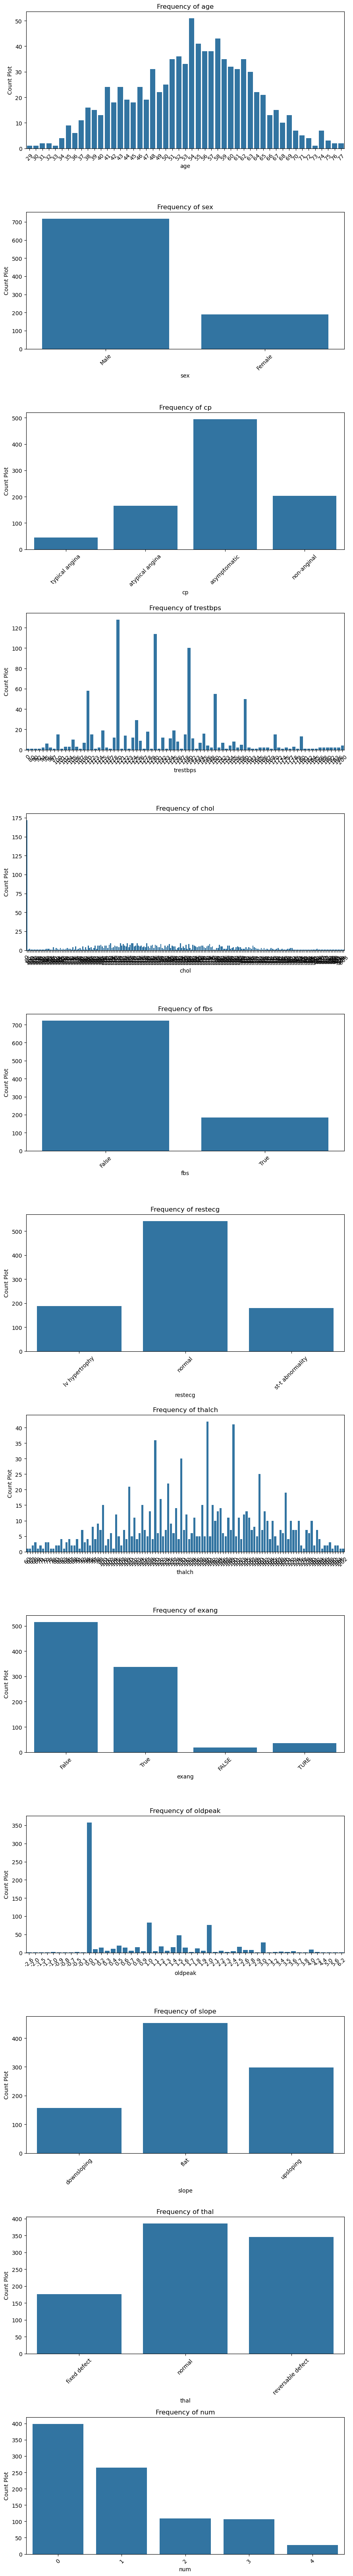

In [ ]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(Data.columns), 1, figsize=(9, len(Data.columns) * 5))

# Plot count plots for each categorical column
for i, column in enumerate(Data.columns):
    sns.countplot(data=Data, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count Plot')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# replace values (some true and false value are worng in this columns so replaced that)
Data.replace({'TURE': True, 'FALSE': False}, inplace=True)

In [ ]:
Data['exang'].unique()

array([False,  True])

In [ ]:
# missing value imputation in oldpeak
Data['oldpeak'] = Data['oldpeak'].fillna(Data['oldpeak'].median())

In [ ]:
Data.isnull().sum()  #null values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
def remove_outliers(Data, threshold=4):
    clean = Data.copy()
    for column in clean.select_dtypes(include=[np.number]).columns:
        z_scores = (clean[column] - clean[column].mean()) / clean[column].std()
        clean = clean[np.abs(z_scores) <= threshold]
    return clean

# Remove outliers using z score
Cleaned = remove_outliers(Data)
Cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


# Feature Engineering

In [ ]:
#create the instance of the labelencoder
# encoded the categorical data
Encoder = LabelEncoder()

Cleaned['sex']= Encoder.fit_transform(Cleaned['sex'])
Cleaned['cp']= Encoder.fit_transform(Cleaned['cp'])
Cleaned['restecg']= Encoder.fit_transform(Cleaned['restecg'])
Cleaned['slope']= Encoder.fit_transform(Cleaned['slope'])
Cleaned['thal']= Encoder.fit_transform(Cleaned['thal'])

Cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,True,1,92,False,0.0,1,0,4
902,62,1,0,160,254,True,2,108,True,3.0,1,1,4
903,53,1,0,125,0,False,1,120,False,1.5,2,2,4
904,62,1,0,166,170,False,2,120,True,3.0,1,2,4


In [ ]:
Cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0


# Decision Tree Classification

#Split Data in x and y

In [ ]:
x=Cleaned.iloc[:,0:12]
y=Cleaned['num']
# or y=iris[:,-1]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,False,2.3,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,True,1,92,False,0.0,1,0
902,62,1,0,160,254,True,2,108,True,3.0,1,1
903,53,1,0,125,0,False,1,120,False,1.5,2,2
904,62,1,0,166,170,False,2,120,True,3.0,1,2


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 843, dtype: int64

#Split entire data in train data and test data

In [ ]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: xtrain, xtest, ytrain and ytest
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((674, 12), (169, 12), (674,), (169,))

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
437,44,1,0,110,197,False,0,177,False,0.0,2,1
194,64,1,0,130,223,False,2,128,False,0.5,1,1
2,57,1,0,140,192,False,1,148,False,0.4,1,0
897,63,1,0,170,177,False,1,84,True,2.5,0,1
822,68,1,2,180,274,True,0,150,True,1.6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
898,64,1,0,134,273,False,1,102,True,4.0,0,1
193,59,0,1,130,188,False,1,124,False,1.0,1,0
665,48,1,0,115,0,True,1,128,False,0.0,1,0
582,41,1,0,120,237,False,1,138,True,1.0,1,2


In [ ]:
y_train

437    1
194    0
2      0
897    4
822    3
      ..
898    4
193    0
665    2
582    1
720    2
Name: num, Length: 674, dtype: int64

#Building Decision Tree Classifier using Entropy Criteria

In [ ]:
Model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0)
# To ensure that you get consistent results every time you run your Decision Tree model,
# you can set the random_state=0 parameter for the Decision Tree itself.

#fit the model on the training dataset
Model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
result_train=Model.predict(x_train)
result_train

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
# Evaluate the model on train and test
matrix_train= confusion_matrix(y_train,result_train) # on training
matrix_train

array([[223,  79,   0,   0,   0],
       [ 53, 148,   0,   0,   0],
       [ 14,  62,   0,   0,   0],
       [ 12,  62,   0,   0,   0],
       [  3,  18,   0,   0,   0]], dtype=int64)

In [ ]:
print(classification_report(y_train,result_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       302
           1       0.40      0.74      0.52       201
           2       1.00      0.00      0.00        76
           3       1.00      0.00      0.00        74
           4       1.00      0.00      0.00        21

    accuracy                           0.55       674
   macro avg       0.83      0.29      0.25       674
weighted avg       0.70      0.55      0.48       674



In [ ]:
result_test = Model.predict(x_test)    # on testing
matrix_test = confusion_matrix(y_test,result_test)
matrix_test

array([[57, 19,  0,  0,  0],
       [ 9, 40,  0,  0,  0],
       [ 4, 21,  0,  0,  0],
       [ 5,  9,  0,  0,  0],
       [ 1,  4,  0,  0,  0]], dtype=int64)

In [ ]:
# Classification Report

In [ ]:
print(classification_report(y_test,result_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        76
           1       0.43      0.82      0.56        49
           2       1.00      0.00      0.00        25
           3       1.00      0.00      0.00        14
           4       1.00      0.00      0.00         5

    accuracy                           0.57       169
   macro avg       0.84      0.31      0.26       169
weighted avg       0.72      0.57      0.50       169



[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\nentropy = 1.9\nsamples = 674\nvalue = [302.0, 201.0, 76.0, 74.0, 21.0]'),
 Text(0.25, 0.5, 'x[9] <= 1.75\nentropy = 2.082\nsamples = 369\nvalue = [79, 148, 62, 62, 18]'),
 Text(0.125, 0.16666666666666666, 'entropy = 1.928\nsamples = 254\nvalue = [74, 109, 34, 31, 6]'),
 Text(0.375, 0.16666666666666666, 'entropy = 2.072\nsamples = 115\nvalue = [5, 39, 28, 31, 12]'),
 Text(0.75, 0.5, 'x[9] <= 1.9\nentropy = 1.222\nsamples = 305\nvalue = [223.0, 53.0, 14.0, 12.0, 3.0]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.968\nsamples = 272\nvalue = [214, 44, 6, 8, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.202\nsamples = 33\nvalue = [9, 9, 8, 4, 3]')]

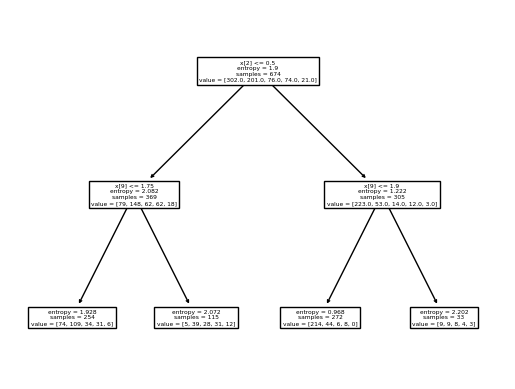

In [ ]:
#PLot the decision tree
tree.plot_tree(Model)

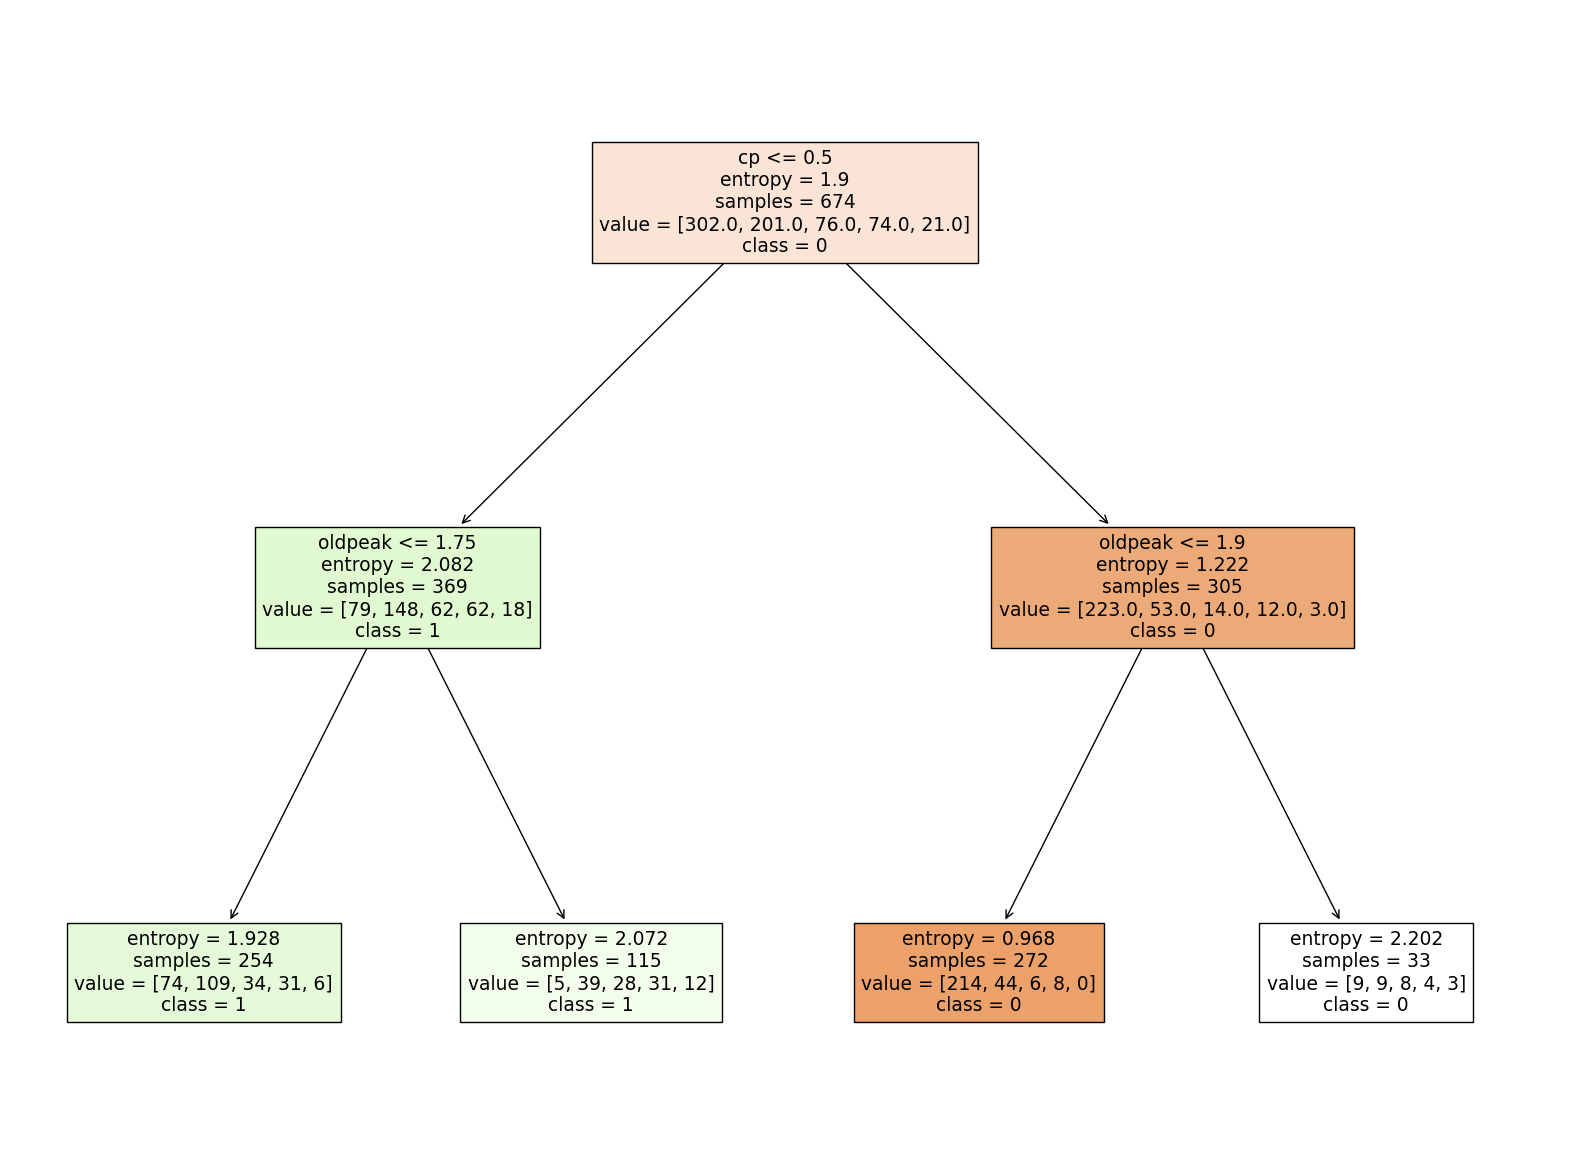

In [ ]:
#plotting the decision tree
from sklearn.tree import plot_tree
features_name = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
columns_name = ['0','1','2','3', '4'] #class

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(Model,
          feature_names = features_name,
          class_names = columns_name,
          filled = True)

plt.show()

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=0)

In [ ]:
Model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#Prediction and computing the accuracy
prediction=Model_gini.predict(x_test)
np.mean(prediction==y_test)*100

57.98816568047337

In [ ]:
result_gini_train = Model_gini.predict(x_train)

In [ ]:
matrix_train = confusion_matrix(y_train,result_gini_train) # on training
matrix_train

array([[268,  34,   0,   0,   0],
       [ 69, 130,   0,   2,   0],
       [ 18,  53,   0,   5,   0],
       [ 16,  44,   0,  14,   0],
       [  7,  13,   0,   1,   0]], dtype=int64)

In [ ]:
print(classification_report(y_train,result_gini_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       302
           1       0.47      0.65      0.55       201
           2       1.00      0.00      0.00        76
           3       0.64      0.19      0.29        74
           4       1.00      0.00      0.00        21

    accuracy                           0.61       674
   macro avg       0.76      0.34      0.33       674
weighted avg       0.67      0.61      0.55       674



In [ ]:
result_gini_test = Model_gini.predict(x_test) # on testing
matrix_test = confusion_matrix(y_test,result_gini_test)
matrix_test

array([[68,  7,  0,  1,  0],
       [19, 29,  0,  1,  0],
       [ 5, 18,  0,  2,  0],
       [ 2, 11,  0,  1,  0],
       [ 2,  2,  0,  1,  0]], dtype=int64)

In [ ]:
print(classification_report(y_test,result_gini_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        76
           1       0.43      0.59      0.50        49
           2       1.00      0.00      0.00        25
           3       0.17      0.07      0.10        14
           4       1.00      0.00      0.00         5

    accuracy                           0.58       169
   macro avg       0.66      0.31      0.28       169
weighted avg       0.64      0.58      0.51       169



# Hyperparameter tuning with gridsearch CV

In [ ]:
# intialize the decision tree model
tree = DecisionTreeClassifier()

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,4,5,9,11,13,15,17,18,19,20,22],
    'min_samples_split': [2,4,5,6,8,9,10,11,12,14,15,18],
    'min_samples_leaf': [1, 2, 5,6,8,9,10,12,14,16,18,20]         # created dict for parameters
}

Grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=3,
                           n_jobs=-1, verbose=1) # intialize the gridsearch cv model
Grid_search.fit(x_train, y_train)   # fitted the model

best_params = Grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 2}


In [ ]:
Final_Model = DecisionTreeClassifier(**best_params)
Final_Model.fit(x_train, y_train)

y_prediction = Final_Model.predict(x_train)  # on training data
print(classification_report(y_train,y_prediction,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       302
           1       0.48      0.61      0.54       201
           2       0.52      0.16      0.24        76
           3       0.58      0.15      0.24        74
           4       1.00      0.00      0.00        21

    accuracy                           0.61       674
   macro avg       0.66      0.36      0.36       674
weighted avg       0.61      0.61      0.57       674



In [ ]:
y_prediction_test = Final_Model.predict(x_test) # on testing data
print(classification_report(y_test, y_prediction_test, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        76
           1       0.39      0.49      0.44        49
           2       0.29      0.08      0.12        25
           3       0.00      0.00      0.00        14
           4       1.00      0.00      0.00         5

    accuracy                           0.56       169
   macro avg       0.48      0.29      0.27       169
weighted avg       0.50      0.56      0.50       169



In [ ]:
y_prediction_test = Final_Model.predict(x_test) # on testing data
print(classification_report(y_test, y_prediction_test, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        76
           1       0.39      0.49      0.44        49
           2       0.29      0.08      0.12        25
           3       0.00      0.00      0.00        14
           4       1.00      0.00      0.00         5

    accuracy                           0.56       169
   macro avg       0.48      0.29      0.27       169
weighted avg       0.50      0.56      0.50       169



# Model Evaluation & Analysis

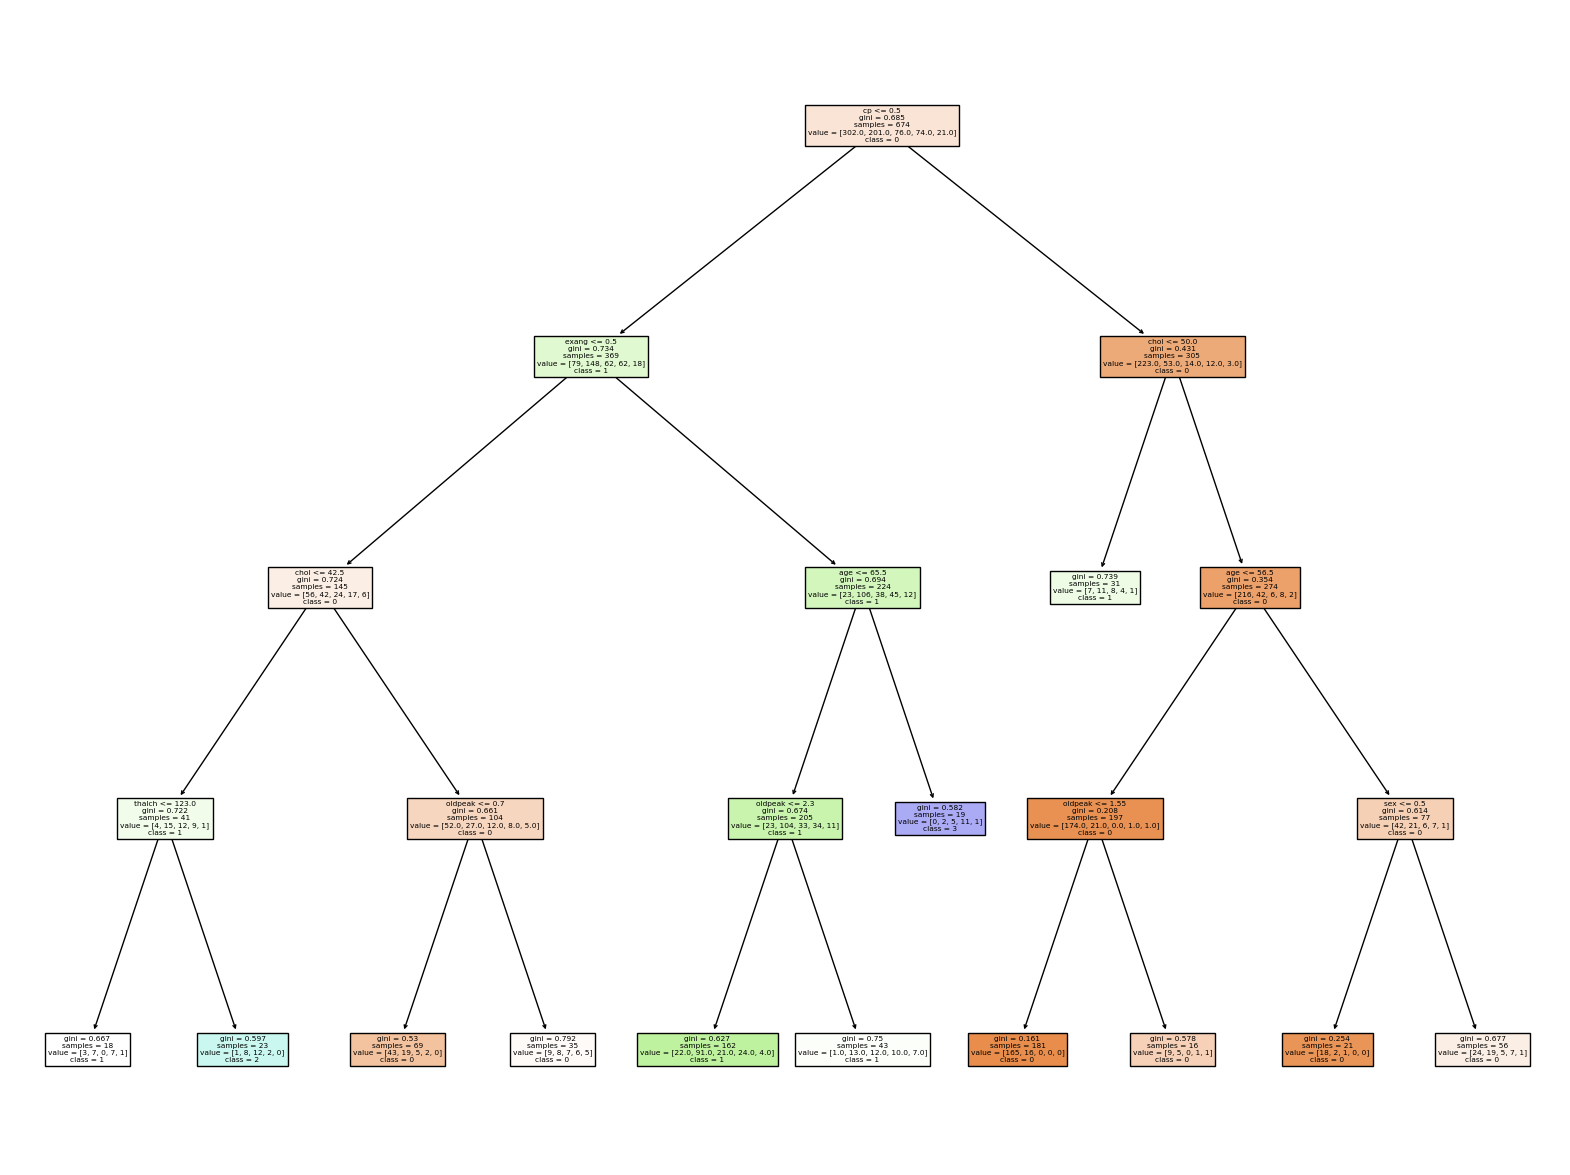

In [ ]:
#visualization tree
feature_name=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
columns_name=['0','1','2','3', '4'] #class

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(Final_Model,
          feature_names = feature_name,
          class_names = column_name,
          filled = True)

plt.show()

# Interview Questions

#1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

some common hyperparameters of Decision Tree models and their impact on performance:
1. max_depth -Limits the maximum depth of the tree.
Effect:Prevents overfitting by restricting how deep the tree can grow. A smaller max_depth reduces complexity (avoiding overfitting), but too small a value might lead to underfitting.
2. min_samples_split-The minimum number of samples required to split a node.
Effect: Higher values prevent the model from learning overly specific patterns (reduces overfitting), while very low values may overfit the data.
3. min_samples_leaf-Minimum number of samples needed at a leaf node.
Effect: Increasing this value makes the tree more generalized (avoiding overfitting) by ensuring that leaf nodes have more samples, preventing overly fine divisions.
4. max_features-The maximum number of features considered for splitting at each node.
Effect: Controls randomness and diversity in splits. Lower values add regularization (reduce variance), while higher values may improve accuracy but increase overfitting risk.
5. criterion (gini or entropy)-The function used to measure the quality of a split.
Effect: gini is faster, while entropy may provide slightly better splits, but usually the difference is minimal in practice.
Tuning these hyperparameters helps balance between overfitting (high variance) and underfitting (high bias) to improve the Decision Tree's performance

#2. What is the difference between the Label encoding and One-hot encoding?
1. Label Encoding-Converts categorical values into numerical labels (integers) by assigning a unique number to each category.Suitable for ordinal data (categories with an inherent order).

2. One-Hot Encoding-Converts each category into binary columns (0s and 1s) where each column represents a unique category.Ideal for nominal data (no inherent order between categories).Avoids introducing ordinal relationships, but can increase dimensionality, especially with many unique categories.
